<a href="https://colab.research.google.com/github/Sabinghalan/Tenslorflow-Deep-Learning-Model/blob/main/CNN_and_Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importing the Dataset and Libraries


In [37]:
import tensorflow as tf
import numpy as np
import pandas as pd
import zipfile
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-12-27 13:27:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.207, 173.194.69.207, 173.194.79.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  37.4MB/s    in 13s     

2023-12-27 13:27:52 (37.1 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [38]:
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [39]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} filenames in '{dirpath}'.")

There are 2 directories and 0 filenames in '10_food_classes_all_data'.
There are 10 directories and 0 filenames in '10_food_classes_all_data/train'.
There are 0 directories and 750 filenames in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 filenames in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 filenames in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 filenames in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 filenames in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 filenames in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 filenames in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 filenames in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 filenames in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 filenames in '10

In [40]:
train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

In [41]:
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted(item.name for item in data_dir.glob('*')))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [42]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + "/" + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (382, 512, 3)


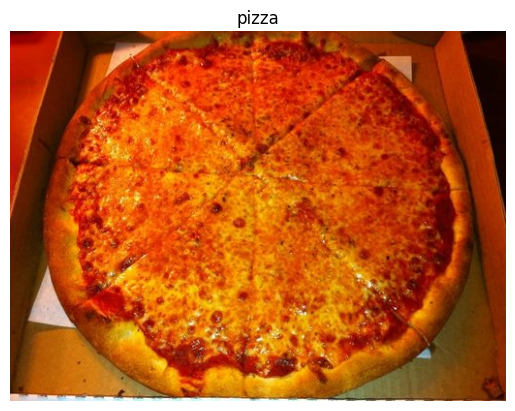

In [43]:
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

#2. Preprocessing the data.

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#3. Creating the models.

In [45]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size= 3, activation = "relu", input_shape = (224, 224, 3)), # first layer specifies input shape (height, width, colour channels
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#4. Fitting a model_1.

In [46]:
history_1 = model_1.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 32s 128ms/step - loss: 2.2419 - accuracy: 0.1584 - val_loss: 2.1442 - val_accuracy: 0.1932
Epoch 2/5
235/235 [==============================] - 30s 129ms/step - loss: 2.0081 - accuracy: 0.2841 - val_loss: 2.0163 - val_accuracy: 0.2696
Epoch 3/5
235/235 [==============================] - 30s 129ms/step - loss: 1.6105 - accuracy: 0.4487 - val_loss: 2.0448 - val_accuracy: 0.2828
Epoch 4/5
235/235 [==============================] - 31s 133ms/step - loss: 0.9020 - accuracy: 0.7072 - val_loss: 2.5257 - val_accuracy: 0.2776
Epoch 5/5
235/235 [==============================] - 33s 139ms/step - loss: 0.2879 - accuracy: 0.9148 - val_loss: 3.8389 - val_accuracy: 0.2544


In [47]:
model_1.evaluate(test_data)

79/79 [==============================] - 6s 81ms/step - loss: 3.8389 - accuracy: 0.2544


[3.838857412338257, 0.25440001487731934]

In [48]:
def plot_relationship_curves(history, model):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

 # For loss
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title(f"{model} Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # For accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.title(f"{model} Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

In [49]:
history_1.history

{'loss': [2.2419285774230957,
  2.008089780807495,
  1.6104656457901,
  0.901988685131073,
  0.28789597749710083],
 'accuracy': [0.15839999914169312,
  0.28413334488868713,
  0.44866666197776794,
  0.7071999907493591,
  0.9147999882698059],
 'val_loss': [2.1441946029663086,
  2.0162620544433594,
  2.0448415279388428,
  2.5256547927856445,
  3.838857889175415],
 'val_accuracy': [0.1932000070810318,
  0.2696000039577484,
  0.28279998898506165,
  0.2775999903678894,
  0.25440001487731934]}

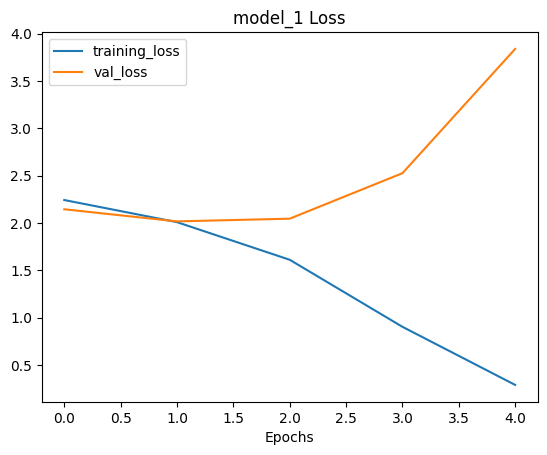

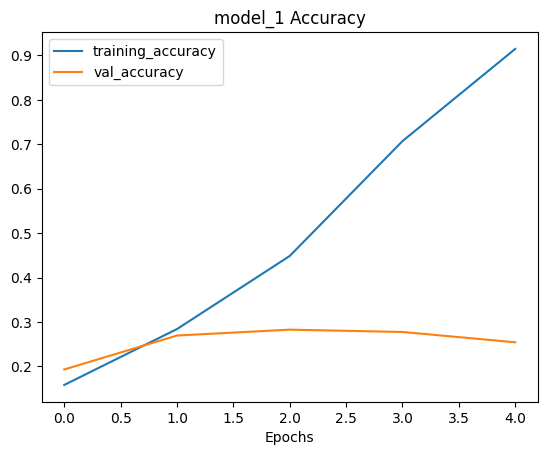

In [50]:
plot_relationship_curves(history_1, model = "model_1")

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_2 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 30s 120ms/step - loss: 2.1716 - accuracy: 0.2163 - val_loss: 1.9840 - val_accuracy: 0.2956
Epoch 2/5
235/235 [==============================] - 30s 127ms/step - loss: 1.8275 - accuracy: 0.3720 - val_loss: 1.9227 - val_accuracy: 0.3192
Epoch 3/5
235/235 [==============================] - 28s 118ms/step - loss: 1.4956 - accuracy: 0.5045 - val_loss: 1.9486 - val_accuracy: 0.3328
Epoch 4/5
235/235 [==============================] - 29s 122ms/step - loss: 1.0213 - accuracy: 0.6748 - val_loss: 2.3706 - val_accuracy: 0.3004
Epoch 5/5
235/235 [==============================] - 29s 125ms/step - loss: 0.5728 - accuracy: 0.8296 - val_loss: 2.6722 - val_accuracy: 0.2800


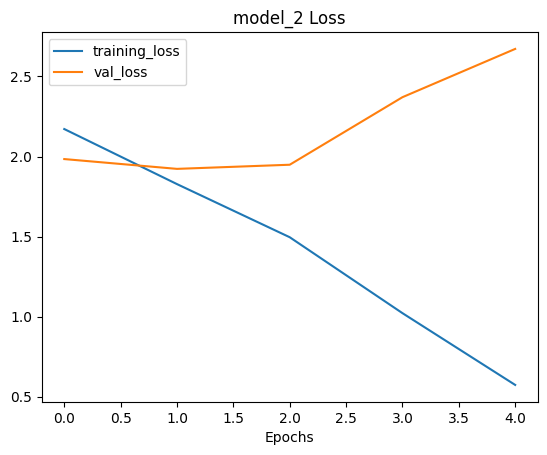

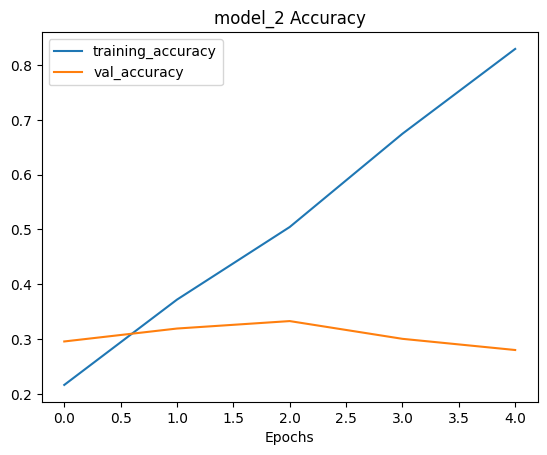

In [52]:
plot_relationship_curves(history_2, "model_2")

In [70]:
# Data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 20,
                                             width_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)


train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = 'categorical')

Found 7500 images belonging to 10 classes.


In [71]:
model_3 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])


model_3.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_3 = model_3.fit(train_data_augmented,
                        epochs = 20,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))



Epoch 1/20
235/235 [==============================] - 108s 452ms/step - loss: 2.1854 - accuracy: 0.1781 - val_loss: 2.0538 - val_accuracy: 0.2680
Epoch 2/20
235/235 [==============================] - 107s 454ms/step - loss: 2.0656 - accuracy: 0.2547 - val_loss: 1.9673 - val_accuracy: 0.2916
Epoch 3/20
235/235 [==============================] - 109s 464ms/step - loss: 2.0136 - accuracy: 0.2891 - val_loss: 1.8766 - val_accuracy: 0.3440
Epoch 4/20
235/235 [==============================] - 108s 459ms/step - loss: 1.9582 - accuracy: 0.3092 - val_loss: 1.8578 - val_accuracy: 0.3392
Epoch 5/20
235/235 [==============================] - 108s 459ms/step - loss: 1.9133 - accuracy: 0.3295 - val_loss: 1.7708 - val_accuracy: 0.3796
Epoch 6/20
235/235 [==============================] - 107s 454ms/step - loss: 1.8795 - accuracy: 0.3429 - val_loss: 1.7419 - val_accuracy: 0.4004
Epoch 7/20
235/235 [==============================] - 108s 458ms/step - loss: 1.8550 - accuracy: 0.3621 - val_loss: 1.7169 -

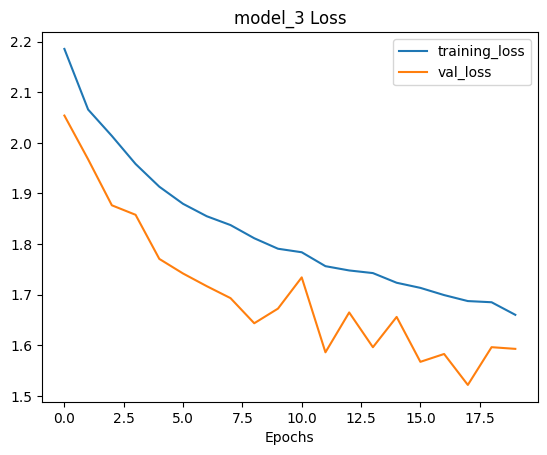

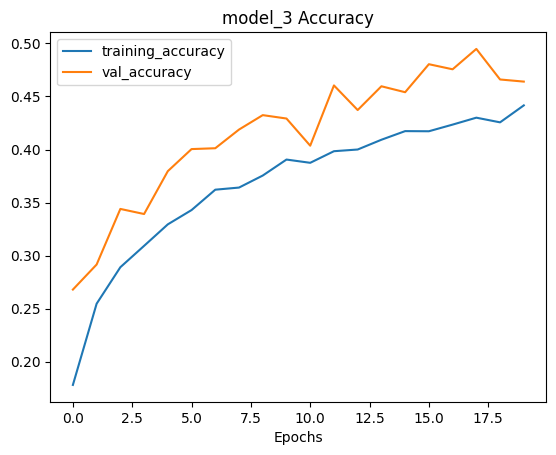

In [72]:
plot_relationship_curves(history_3, "model_3")

#4. Predicting

In [73]:
def load_and_prep_image(filename, img_shape = 224):

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels = 3)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  return img


In [74]:
def pred_and_plot(model, filename, class_names):

  img = load_and_prep_image(filename)

  # make prediction
  pred = model.predict(tf.expand_dims(img, axis= 0))
  print(pred)
  # get prediction
  #pred_class = class_names[int(tf.round(pred)[0][0])]"""
  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 118ms/step
[[1.5907356e-03 2.3028706e-03 2.0504035e-03 1.0085930e-02 1.7975314e-03
  1.1935263e-06 9.7993189e-01 2.7633511e-04 2.1717568e-04 1.7457807e-03]]


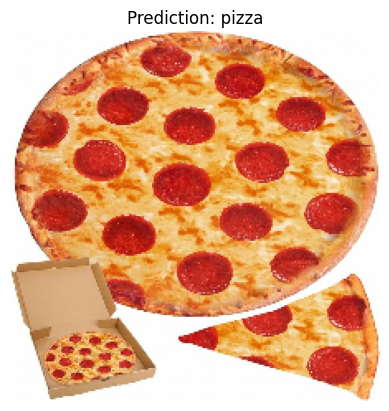

In [75]:
pred_and_plot(model_3,
              filename = "pizza.jpg",
              class_names = class_names)

1/1 [==============================] - 0s 24ms/step
[[8.4050605e-08 4.6611610e-03 1.2256666e-06 4.1855377e-04 3.7465000e-04
  4.0401588e-05 3.5958954e-06 2.8055199e-04 9.9420565e-01 1.4077696e-05]]


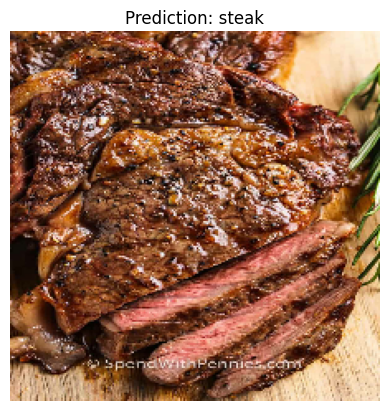

In [76]:
pred_and_plot(model_3,
              filename = "steak.jpg",
              class_names = class_names)

1/1 [==============================] - 0s 40ms/step
[[0.04266649 0.01413214 0.01414307 0.09005339 0.0658334  0.09846357
  0.13413736 0.12003313 0.11990209 0.30063537]]


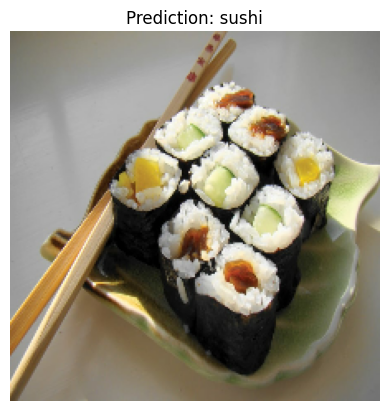

In [77]:
pred_and_plot(model_3,
              filename = "susi.jpg",
              class_names = class_names)

1/1 [==============================] - 0s 28ms/step
[[0.06244136 0.00936539 0.2561573  0.06005498 0.09773591 0.0081621
  0.10515811 0.33752102 0.01669113 0.04671264]]


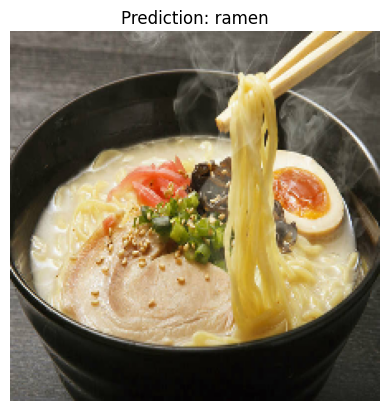

In [78]:
pred_and_plot(model_3,
              filename = "ramen.jpg",
              class_names = class_names)

1/1 [==============================] - 0s 20ms/step
[[7.4108022e-01 1.6686944e-02 1.0664449e-01 9.3777766e-03 1.1684308e-02
  4.5277414e-04 7.2870560e-02 3.5174176e-02 1.3660619e-03 4.6626967e-03]]


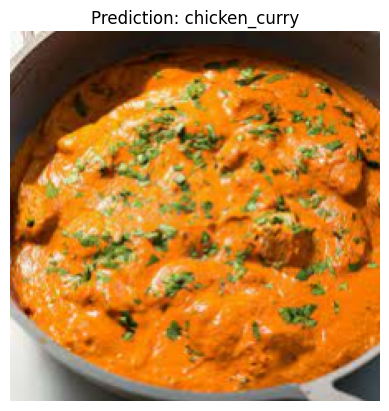

In [91]:
pred_and_plot(model_3,
              filename = "chicken_curry.jpg",
              class_names = class_names)

1/1 [==============================] - 0s 17ms/step
[[0.02898991 0.05081607 0.00666829 0.01782716 0.11205439 0.50460523
  0.02296924 0.0161812  0.08007082 0.1598177 ]]


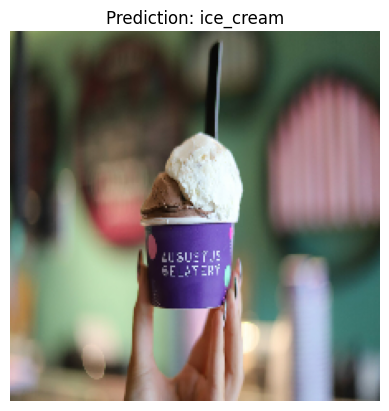

In [80]:
pred_and_plot(model_3,
              filename = "ice_cream.jpeg",
              class_names = class_names)

1/1 [==============================] - 0s 19ms/step
[[4.0799812e-03 2.7108396e-04 6.9465333e-01 2.7628936e-02 2.0826994e-02
  1.3193472e-03 2.1203537e-01 2.5267391e-02 1.2687185e-03 1.2648919e-02]]


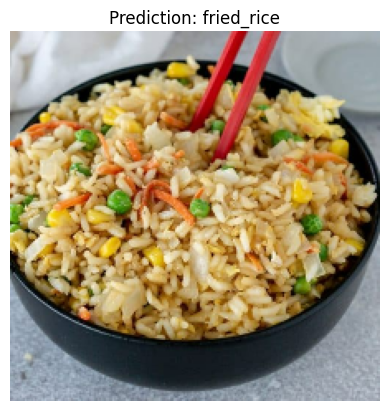

In [81]:
pred_and_plot(model_3,
              filename = "fried_rice.jpg",
              class_names = class_names)

1/1 [==============================] - 0s 27ms/step
[[0.06708288 0.26455313 0.00181985 0.31033304 0.02867696 0.00435092
  0.14114393 0.00096021 0.04104032 0.14003877]]


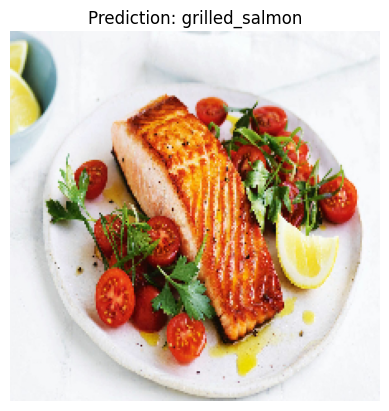

In [89]:
pred_and_plot(model_3,
              filename = "grilled_salmon.jpg",
              class_names = class_names)

1/1 [==============================] - 0s 17ms/step
[[0.00818943 0.05996002 0.04975405 0.12496073 0.4762447  0.02994516
  0.02250514 0.01227231 0.19109695 0.02507156]]


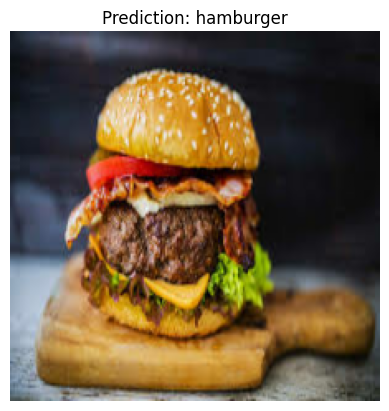

In [83]:
pred_and_plot(model_3,
              filename = "ham_burger.jpeg",
              class_names = class_names)

1/1 [==============================] - 0s 104ms/step
[[3.1607707e-03 9.0447170e-01 1.9713282e-04 2.8679669e-02 2.7591459e-02
  4.4684543e-04 3.8997844e-04 8.0261299e-05 3.2757871e-02 2.2242151e-03]]


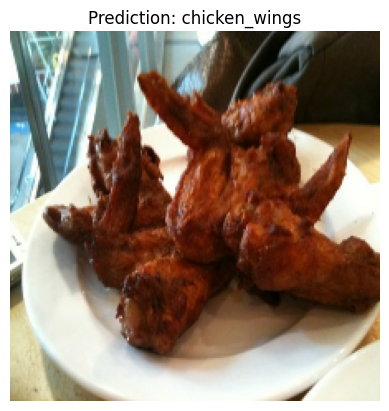

In [100]:
pred_and_plot(model_3,
              filename = "chicken_wings.jpg",
              class_names = class_names)